<a href="https://colab.research.google.com/github/mkbahk/AmazonBraket/blob/main/Qiskit_Runtime_Sampler_Primitives_mkbahk_20241010.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
### Qiskit 설치: Windows, 클라우드 환경 ###
%pip install qiskit[visualization]==1.1.0
%pip install qiskit-ibm-runtime==0.30.0
%pip install qiskit-aer==0.15.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 2.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 6.0 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136817 sha256=443853914aedce6307168abfeb54a750bf9aa475e5194a0a8b2da394a5cfbb79
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 23.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [2]:
%pip show qiskit qiskit-ibm-runtime qiskit-aer

Name: qiskit
Version: 1.1.0
Summary: An open-source SDK for working with quantum computers at the level of extended quantum circuits, operators, and primitives.
Home-page: https://www.ibm.com/quantum/qiskit
Author: 
Author-email: Qiskit Development Team <qiskit@us.ibm.com>
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: dill, numpy, python-dateutil, rustworkx, scipy, stevedore, symengine, sympy, typing-extensions
Required-by: qiskit-aer, qiskit-ibm-runtime
---
Name: qiskit-ibm-runtime
Version: 0.30.0
Summary: IBM Quantum client for Qiskit Runtime.
Home-page: https://github.com/Qiskit/qiskit-ibm-runtime
Author: Qiskit Development Team
Author-email: qiskit@us.ibm.com
License: Apache 2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: ibm-platform-services, numpy, pydantic, python-dateutil, qiskit, requests, requests-ntlm, urllib3, websocket-client
Required-by: 
---
Name: qiskit-aer
Version: 0.15.1
Summary: Aer - High performance simulators for 

In [38]:
import numpy as np
from qiskit.circuit.library import IQP
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import SparsePauliOp, random_hermitian
from qiskit.transpiler import Layout, CouplingMap
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager

from qiskit_ibm_runtime import QiskitRuntimeService, SamplerV2 as Sampler, EstimatorV2 as Estimator, Session, Options
from qiskit_ibm_runtime.fake_provider import FakeManilaV2

from qiskit_aer import AerSimulator

In [53]:
# Connecting runtime account
service = QiskitRuntimeService(channel="ibm_quantum", token="16d422f9c8fd7a34c34fa04292a3b27a4ebe822dd653724757d34fb7737a6e80f652b48092bb9dcfe2d295c3573298b01b8d95ea9693d33e106bb30591e77817")
#service.save_account(channel="ibm_quantum", token="YOUR_API_TOKEN")
#backends = service.least_busy(min_num_qubits=2)
#service.backends("ibm_brisbane")
backends=service.backends()
print(backends)

[<IBMBackend('ibm_brisbane')>, <IBMBackend('ibm_kyiv')>, <IBMBackend('ibm_sherbrooke')>]


In [54]:
backend=backends[0]
print(backend)

<IBMBackend('ibm_brisbane')>


In [55]:
# Bell 상태 생성 회로 작성
qc = QuantumCircuit(2, 2)
qc.h(0)           # 큐빗 0에 Hadamard 게이트
qc.cx(0, 1)       # 큐빗 0에서 큐빗 1로 CNOT 게이트
qc.measure([0, 1], [0, 1])  # 두 큐빗을 측정

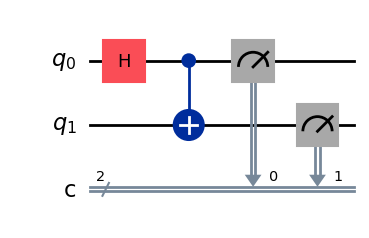

In [56]:
qc.draw('mpl')

In [57]:
# Transpile to an ISA Circuit for the intended backend
isa_bell_meas = transpile(qc, backend=backend)
pub_bell_meas = (isa_bell_meas)

In [81]:
# Estimator를 설정합니다
#sampler = Sampler(backend)
sampler = Sampler(AerSimulator())
# sampler로 회로를 실행합니다.
job = sampler.run([pub_bell_meas], shots=10)

# 결과 가져오기
result = job.result()
counts = result[0].data.counts
print(counts)


AttributeError: 'DataBin' object has no attribute 'counts'

ValueError: setting an array element with a sequence.

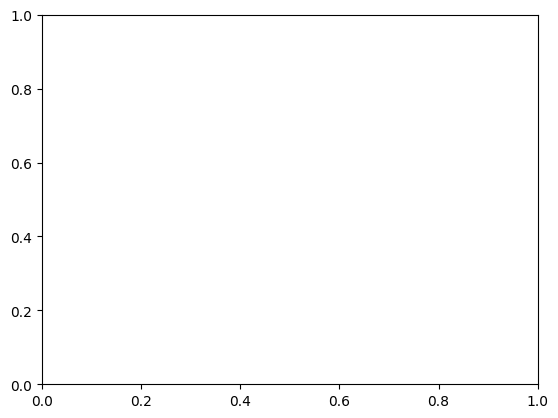

In [77]:
from qiskit.visualization import plot_histogram
# 결과를 히스토그램으로 시각화
plot_histogram(counts)